In [70]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

import datetime
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

In [71]:
start  = datetime.datetime(2006,1,1)
end  = datetime.datetime(2016,1,1)

In [72]:
#df = pd.read_pickle('all_banks')

In [73]:
BAC = web.DataReader("BAC",'stooq',start,end)

# CitiGroup
C =  web.DataReader("C",'stooq',start,end)

# Goldman Sachs
GS =  web.DataReader("GS",'stooq',start,end)

# JPMorgan Chase
JPM = web.DataReader("JPM",'stooq',start,end)

# Morgan Stanley
MS = web.DataReader("MS",'stooq',start,end)

# Wells Fargo
WFC =  web.DataReader("WFC",'stooq',start,end)

In [74]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
...,...,...,...,...,...
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07


In [75]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [76]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [77]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [78]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [79]:
bank_stocks['BAC']['Close'].max()

46.2013

In [80]:
for tick in tickers:
     print(tick,   bank_stocks[tick]['Close'].max()) 
    

BAC 46.2013
C 466.812
GS 203.691
JPM 57.1634
MS 58.5624
WFC 47.0925


In [81]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [82]:
returns = pd.DataFrame()

In [83]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

C:\Users\nkkum\AppData\Local\Temp\ipykernel_26032\425438776.py:2: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.



In [84]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:14

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:14

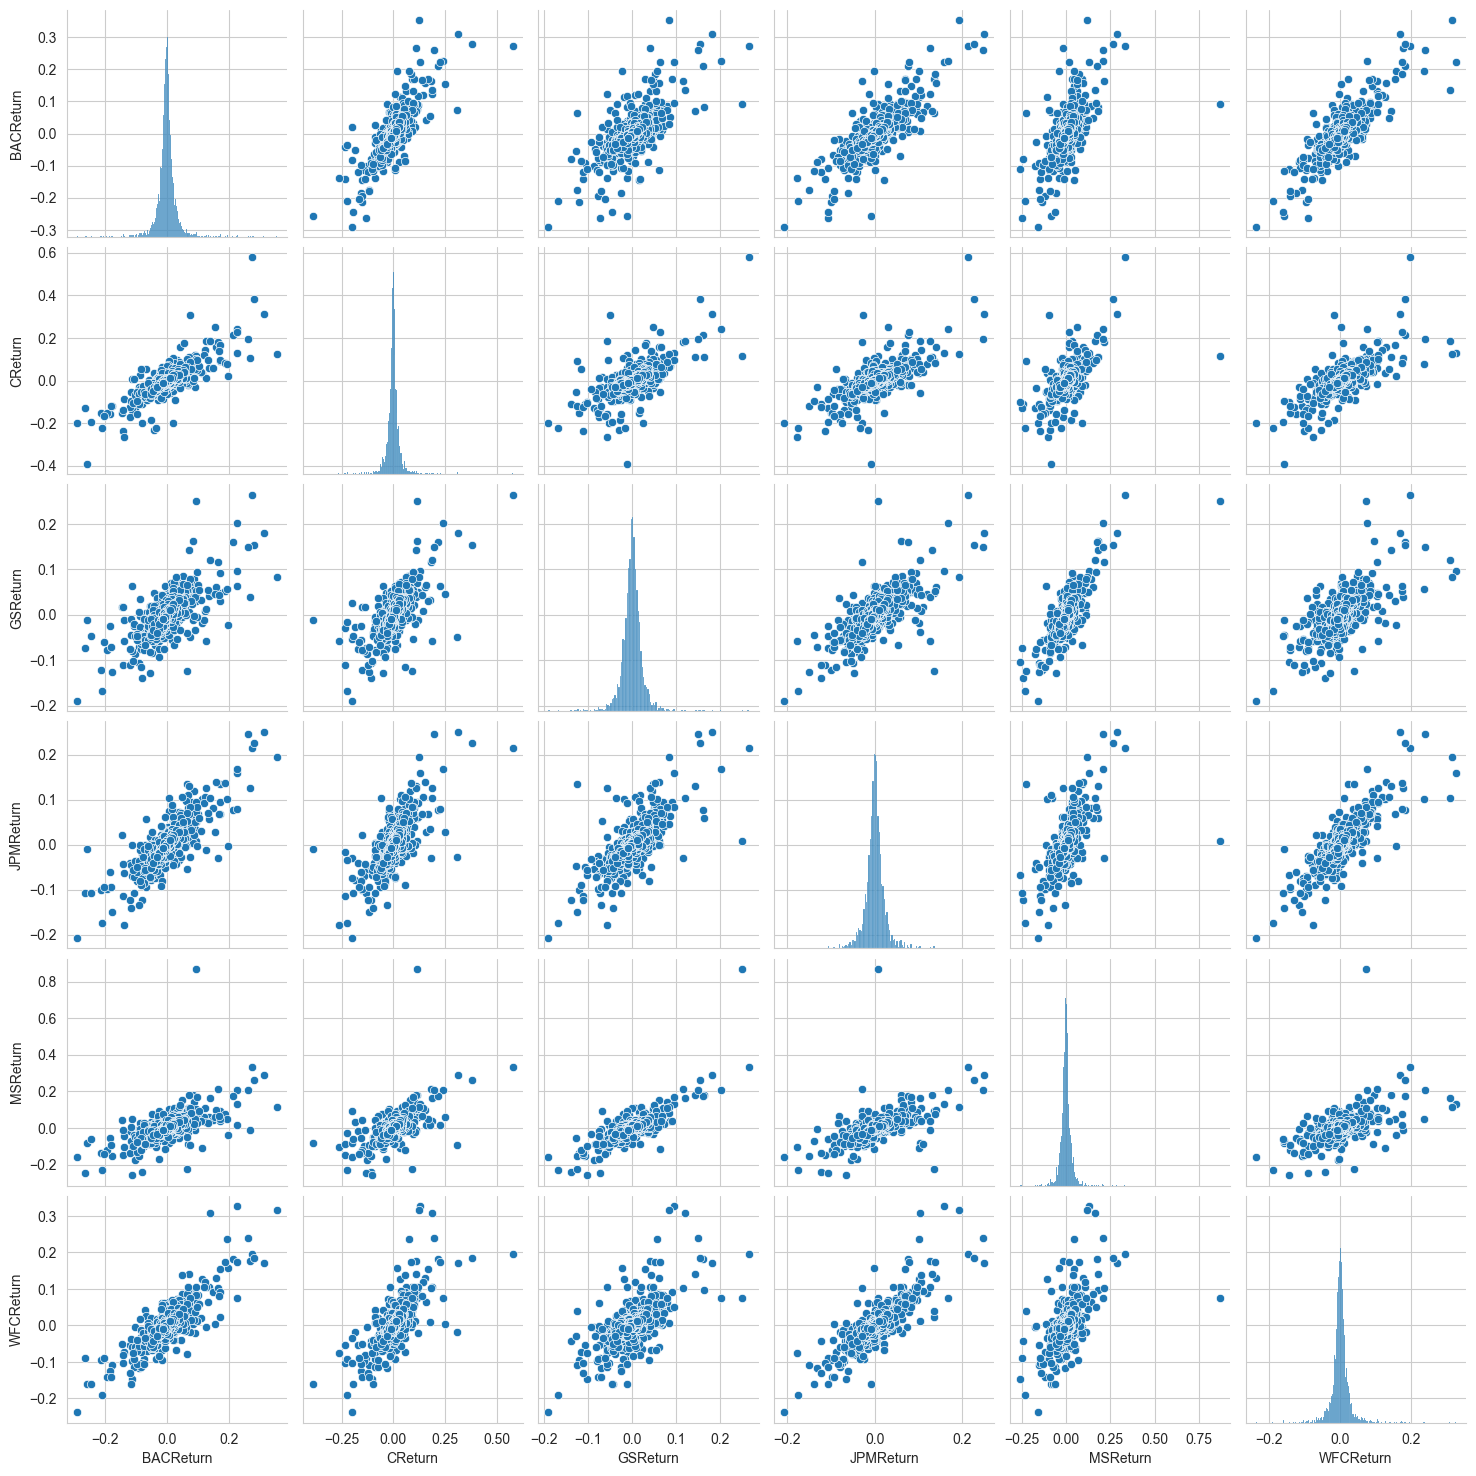

In [85]:
sns.pairplot(returns[1:])

In [86]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [87]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [88]:
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037708
WFCReturn    0.030221
dtype: float64

In [89]:
returns.loc['2015-01-01': '2015-12-31'].std()

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

C:\Users\nkkum\AppData\Local\Temp\ipykernel_26032\1317998596.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='MSReturn', ylabel='Density'>

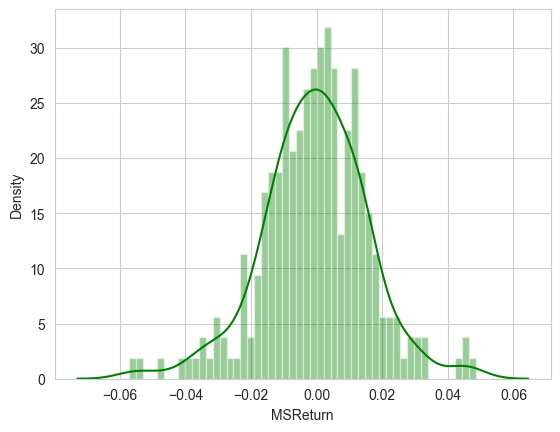

In [90]:
sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MSReturn'], color = 'green', bins = 50)

C:\Users\nkkum\AppData\Local\Temp\ipykernel_26032\1834205704.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\nkkum\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='CReturn', ylabel='Density'>

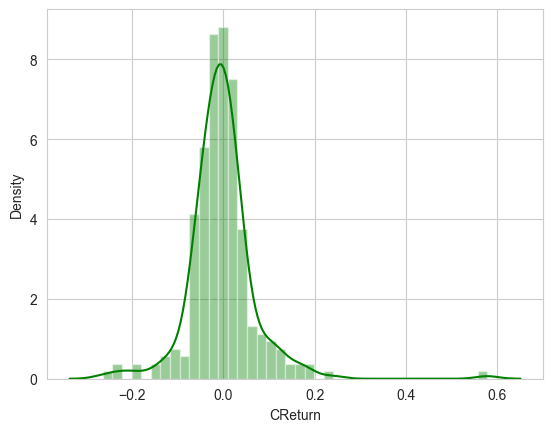

In [91]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31']['CReturn'], color = 'green', bins  = 40)

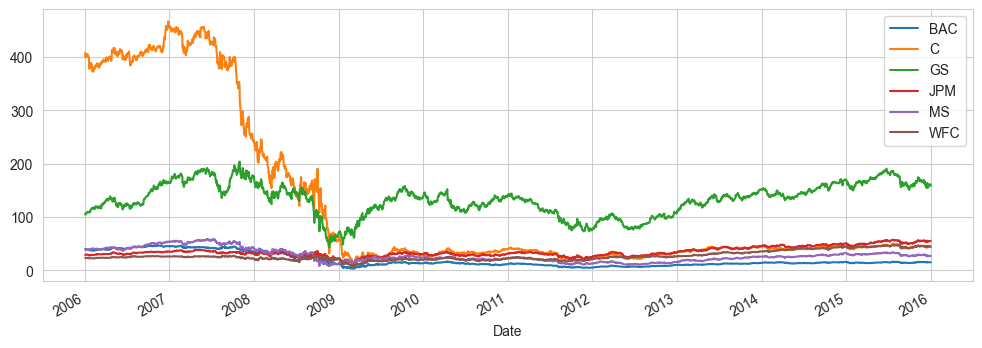

In [92]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12, 4))
    
plt.legend()    

<Axes: xlabel='Date'>

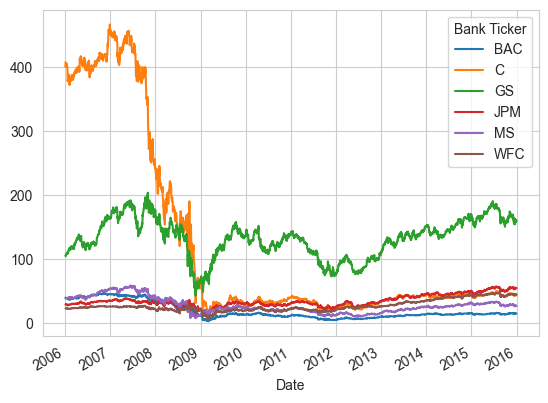

In [93]:
bank_stocks.xs(key = 'Close', axis  =1, level = 'Stock Info').plot()

In [94]:
bank_stocks.xs(key = 'Close', axis  =1, level = 'Stock Info').iplot()

In [95]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
...,...,...,...,...,...
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07


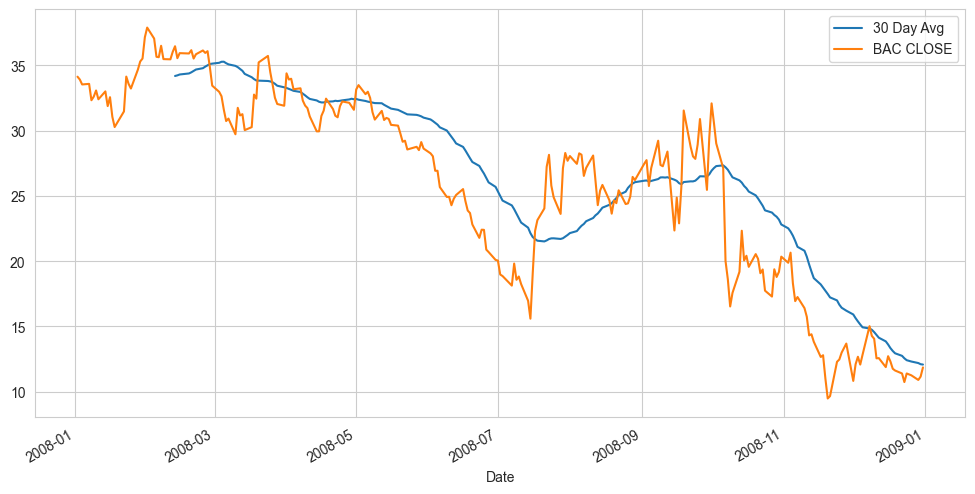

In [96]:
import matplotlib.pyplot as plt

"""
BAC.index = pd.to_datetime(BAC.index)
BAC = BAC.sort_index()

# Filtering the DataFrame to the year 2008
BAC_2008 = BAC['2008-01-01':'2008-12-31']

# Ploting the rolling 30 day average and Close Price
plt.figure(figsize=(12,6))
BAC_2008['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC_2008['Close'].plot(label='BAC CLOSE')
plt.legend()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling 30 Day Average vs. BAC Close Price (2008)')

# Show the plot
plt.show()


UP and Down Both code are correct 
"""
#BAC.index = pd.to_datetime(BAC.index)
BAC = BAC.sort_index()
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [97]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

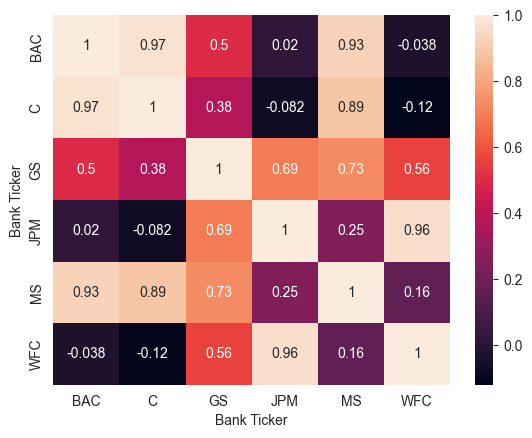

In [98]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

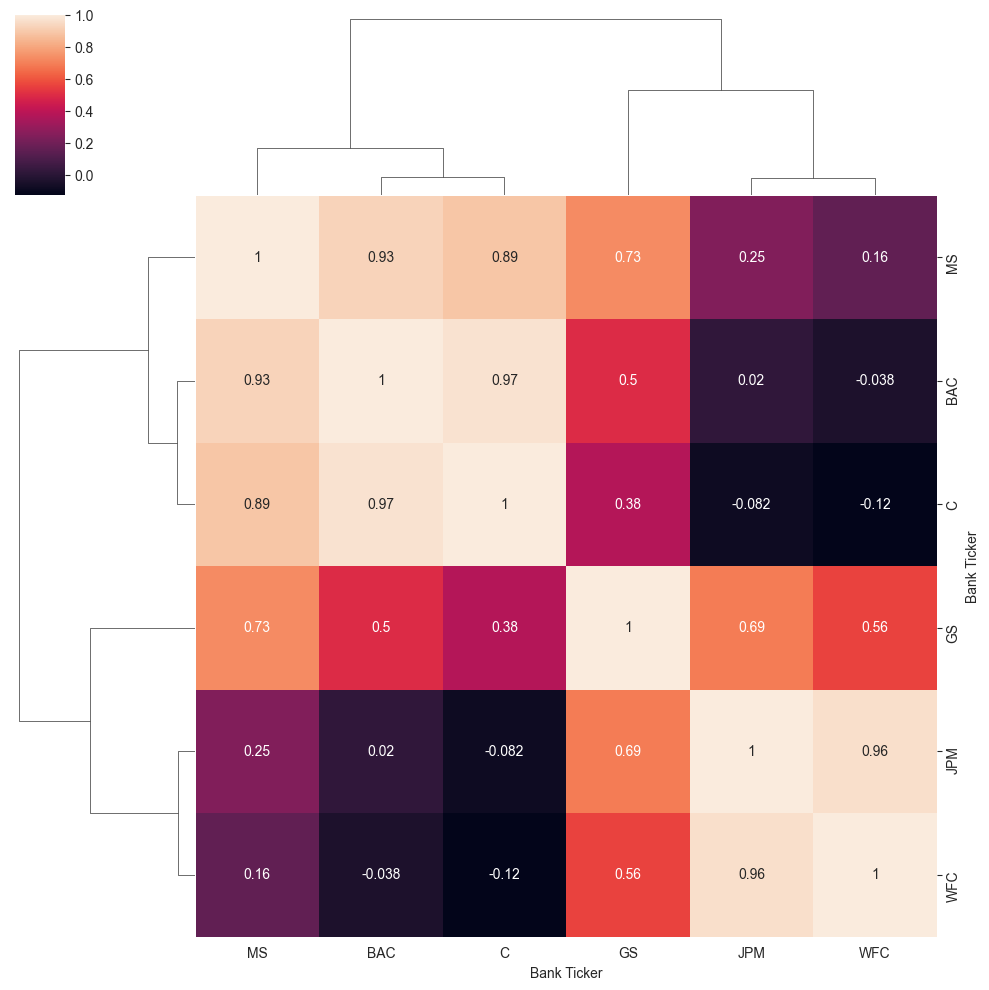

In [99]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [100]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [101]:
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

In [102]:
BAC


,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.4871,39.7023,38.8390,39.6217,1.936396e+07
2006-01-04,39.5549,39.7592,39.0904,39.2004,2.110031e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
...,...,...,...,...,...
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07


In [103]:
BAC15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01' : '2016-01-01']
BAC15.iplot(kind = 'candle')

In [104]:
MS = MS.sort_index()
MS['Close'].loc['2015-01-01' : '2016-01-01'].ta_plot(study = 'sma', periods = [13,21,15])

In [105]:
#BAC = BAC.sort_index()
BAC['Close'].loc['2015-01-01' : '2016-01-01'].ta_plot(study = 'boll')